In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from pathlib import Path
from keras.preprocessing import image
import numpy as np
import tensorflow as tf

C:\Users\ravip\anaconda3\lib\site-packages\requests\__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.14) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [9]:
train_dir = '/content/Indian-Currency-Classification-main/train'   

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
          #train_dir, 
    directory=r"C:\Users\ravip\Indian-Currency-Classification-main\Indian-Currency-Classification-main\train",
          labels='inferred', 
          label_mode='int',
          class_names=['10', '20', '50', '100', '200', '500', '2000'], 
          color_mode='rgb', 
          batch_size=32, 
          image_size=(224,224), 
          shuffle=True, 
          seed=123, 
          validation_split=0.2, 
          subset='training',
          interpolation='bicubic', 
          follow_links=False, 
          smart_resize=True
        )

validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
          directory=r"C:\Users\ravip\Indian-Currency-Classification-main\Indian-Currency-Classification-main\train", 
          labels='inferred', 
          label_mode='int',
          class_names=['10', '20', '50', '100', '200', '500', '2000'], 
          color_mode='rgb', 
          batch_size=32, 
          image_size=(224,224), 
          shuffle=False, 
          seed=123, 
          validation_split=0.2, 
          subset='validation',
          interpolation='bicubic', 
          follow_links=False, 
          smart_resize=True
        )

Found 1239 files belonging to 7 classes.
Using 992 files for training.
Found 1239 files belonging to 7 classes.
Using 247 files for validation.


In [10]:
def normalize(image,label):
    """
    Returns normalized image and its label
    """ 
    image = tf.cast(image/255. ,tf.float32)
    return image,label

In [11]:
train_dataset = train_dataset.map(normalize)
validation_dataset = validation_dataset.map(normalize)

In [12]:
    model = tf.keras.Sequential()
    
    # Block 1
    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(224,224,3)))
    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)))
    
    # Block 2
    model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)))
    
    # Block 3
    model.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)))
    
    # Block 4
    model.add(tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)))
    
    # Block 5
    model.add(tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)))
    
    # Classification block
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(4096, activation='relu'))
    model.add(tf.keras.layers.Dense(4096, activation='relu'))
    model.add(tf.keras.layers.Dense(7, activation='softmax'))

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_14 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_16 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                  

In [14]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
    metrics=['accuracy']
    )

In [16]:
model.fit(train_dataset,epochs=10)

Epoch 1/10
31/31 [==============================] - 1037s 33s/step - loss: 1.3229 - accuracy: 0.4325
Epoch 2/10
31/31 [==============================] - 887s 28s/step - loss: 1.1988 - accuracy: 0.4940
Epoch 3/10
31/31 [==============================] - 1418s 46s/step - loss: 1.0828 - accuracy: 0.5363
Epoch 4/10
31/31 [==============================] - 918s 30s/step - loss: 1.0878 - accuracy: 0.5554
Epoch 5/10
31/31 [==============================] - 757s 24s/step - loss: 0.9247 - accuracy: 0.6280
Epoch 6/10
31/31 [==============================] - 1018s 33s/step - loss: 0.7961 - accuracy: 0.7026
Epoch 7/10
31/31 [==============================] - 937s 30s/step - loss: 0.6495 - accuracy: 0.7369
Epoch 8/10
31/31 [==============================] - 970s 31s/step - loss: 0.5205 - accuracy: 0.8024
Epoch 9/10
31/31 [==============================] - 835s 27s/step - loss: 0.4365 - accuracy: 0.8438
Epoch 10/10
31/31 [==============================] - 846s 27s/step - loss: 0.4046 - accuracy: 0.8

In [17]:
val_loss, val_acc = model.evaluate(validation_dataset, verbose='auto')
print(f"Validation:\n\tloss:{val_loss} \n\taccuracy:{val_acc}")

8/8 [==============================] - 62s 7s/step - loss: 0.3432 - accuracy: 0.9271
Validation:
	loss:0.34318894147872925 
	accuracy:0.9271255135536194


In [29]:
test_dir = r"C:\Users\ravip\Indian-Currency-Classification-main\Indian-Currency-Classification-main\test"

test_imageID = []
# r=root, d=directories, f = files

for r, d, f in os.walk(test_dir, topdown=True):
    for file in f:
      if '.jpg' in file:
          test_imageID.append(Path(file).stem)
test_imageID = sorted(test_imageID)

In [30]:
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
          test_dir, 
          labels=None, 
          label_mode=None,
          class_names = None,
          color_mode='rgb', 
          batch_size=1,
          shuffle = False,
          image_size=(224,224), 
          interpolation='bicubic', 
          smart_resize=True
        )

Found 54 files belonging to 1 classes.


In [31]:
def normalize_test(image):
  """
    Returns normalized image and its label
  """
  image = tf.cast(image/255. ,tf.float32)
  return image

In [32]:
test_dataset = test_dataset.map(normalize_test)

In [33]:
predictions = model.predict(test_dataset)

54/54 [==============================] - 19s 342ms/step


In [34]:
pred_category = np.argmax(predictions,axis = 1)     

In [35]:
labels_name = ['10', '20', '50', '100', '200', '500', '2000']
pred_output_labels = [labels_name[i] for i in pred_category]

In [36]:
test_images = list(test_dataset.as_numpy_iterator()) 
num_test_images = len(test_images)

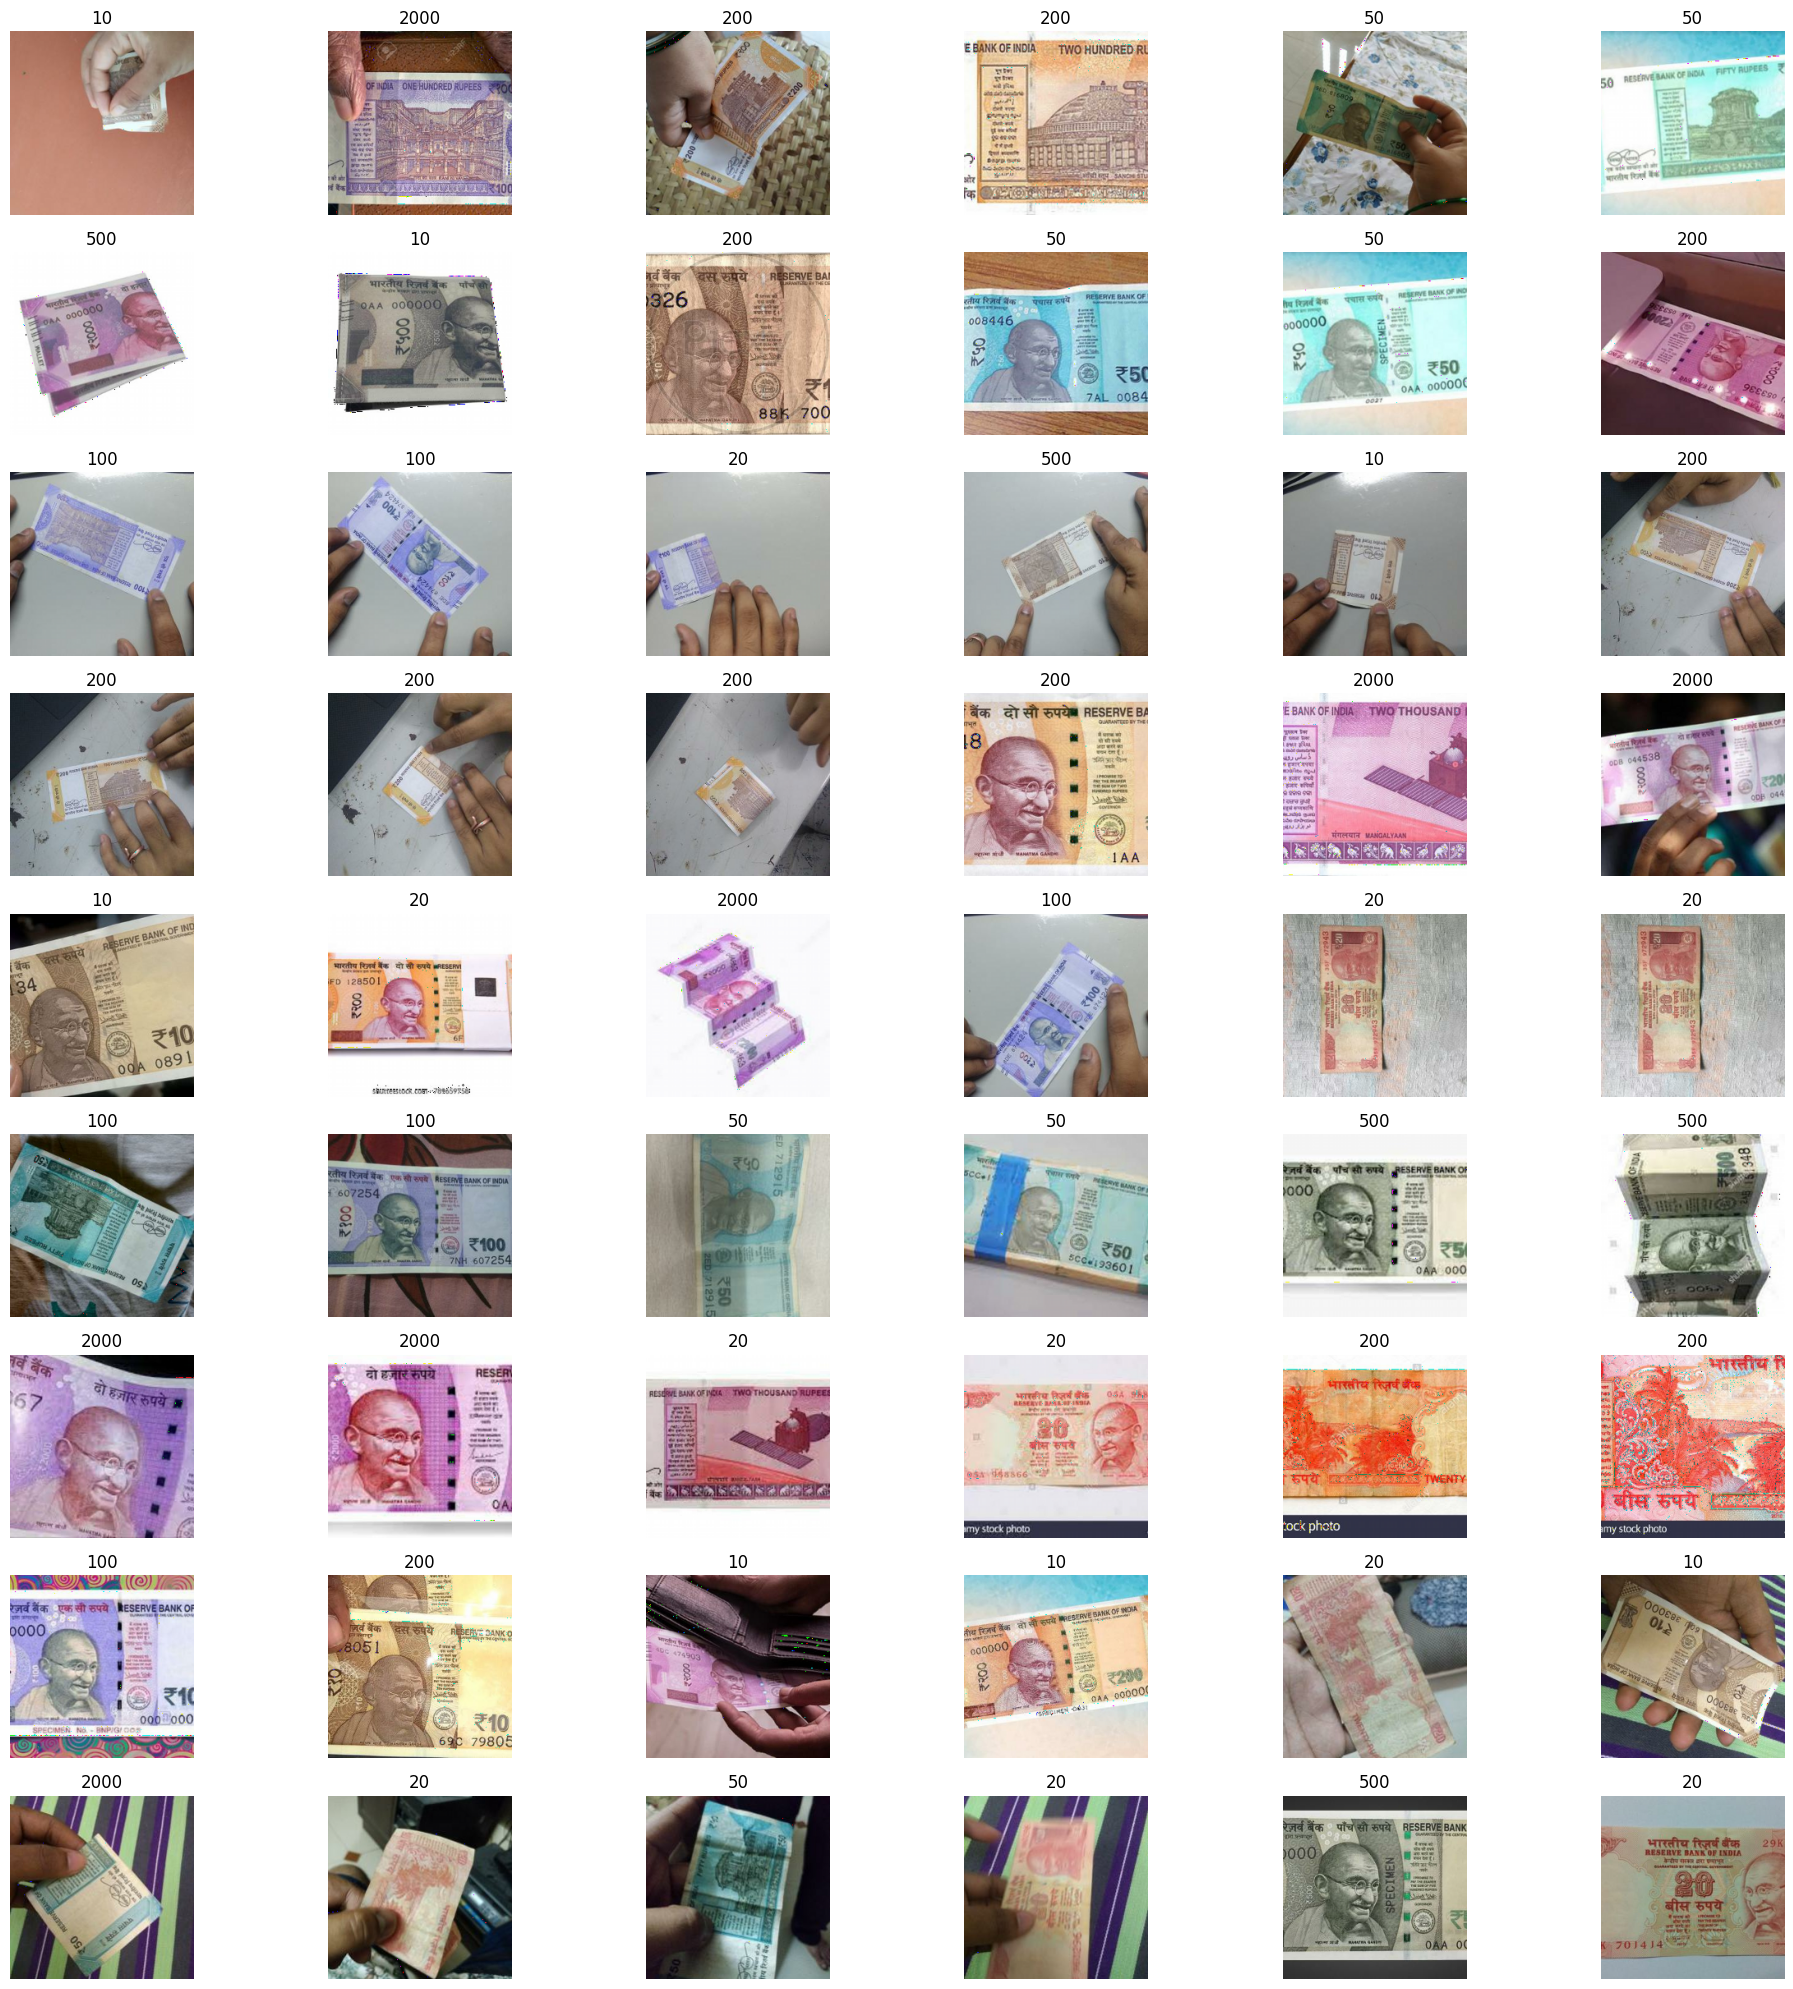

In [37]:
subplot_rows = num_test_images//6 + (1 if num_test_images%6!=0 else 0)
subplot_columns = num_test_images if num_test_images<6 else 6

plt.figure(figsize=(20, 20))
i = 0     

for images in test_images:
  ax = plt.subplot(subplot_rows, subplot_columns, i + 1)
  plt.imshow((np.squeeze(images) * 255).astype(np.uint8), cmap = 'gray')
  plt.title(pred_output_labels[i])
  plt.axis("off")
  i = i + 1

plt.tight_layout()
plt.show()